<a href="https://colab.research.google.com/github/FernandoLajus/Python_pd_bootcamp/blob/main/Python_Geospatial_Tools(Anaconda).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Algumas bibliotecas do Python para trabalhar com dados geoespaciais:**

Dask (horizontal Scaling)

Numba e Cuda (vertical scaling)

STAC/Intak e Zarr and fsspec-refence-maker (Data access scaling (indexing big collections)

Arrow (Vectoring)

GeoPandas e SpatialPandas para trabalhos em geral com dados espaciais



In [ ]:
!pip install geopandas

In [6]:
import numpy as np
import pandas as pd
import geopandas as gpd

#**dask.distributed**

Starting the Dask Client is optional. It will provide a dashboard which is useful to gain insight on the computation

In [15]:
from dask.distributed import Client, progress

client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='16GB')

client

/usr/local/lib/python3.7/dist-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36455 instead
  http_address["port"], self.http_server.port


Client Scheduler: inproc://172.28.0.2/605/8 Dashboard: http://172.28.0.2:36455/status,Cluster Workers: 1 Cores: 4 Memory: 13.62 GB


#**dask.array**
Dask arrays coordinate many Numpy arrays, arranged into chunks within a grid. They support a large subset of the Numpy API.

In [ ]:
import dask.array as da

x = da.random.random((1000, 1000), chunks=(200, 200))

x

dask.array<random_sample, shape=(1000, 1000), dtype=float64, chunksize=(200, 200), chunktype=numpy.ndarray>

In [ ]:
summed= x.sum(axis=1)
summed

dask.array<sum-aggregate, shape=(1000,), dtype=float64, chunksize=(200,), chunktype=numpy.ndarray>

Dask Dataframes coordinate many Pandas dataframes, partitioned along an index. They support a large subset of the Pandas API.

In [17]:
import dask

import dask.dataframe as dd

ddf = dask.datasets.timeseries()

ddf

,id,name,x,y
npartitions=30,,,,
2000-01-01,int64,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


#**Numba**
Numba translates Python functions to optimized machine code at runtime using the industry-standard LLVM compiler library. Numba-compiled numerical algorithms in Python can approach the speeds of C or FORTRAN.

Documentation
GitHub

In [21]:
from numba import jit

x = np.arange(100).reshape(10, 10)

@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def go_fast(a): # Function is compiled to machine code when called the first time
    trace = 0.0
    for i in range(a.shape[0]):   # Numba likes loops
        trace += np.tanh(a[i, i]) # Numba likes NumPy functions
    return a + trace              # Numba likes NumPy broadcasting

print(go_fast(x))

[[  9.  10.  11.  12.  13.  14.  15.  16.  17.  18.]
 [ 19.  20.  21.  22.  23.  24.  25.  26.  27.  28.]
 [ 29.  30.  31.  32.  33.  34.  35.  36.  37.  38.]
 [ 39.  40.  41.  42.  43.  44.  45.  46.  47.  48.]
 [ 49.  50.  51.  52.  53.  54.  55.  56.  57.  58.]
 [ 59.  60.  61.  62.  63.  64.  65.  66.  67.  68.]
 [ 69.  70.  71.  72.  73.  74.  75.  76.  77.  78.]
 [ 79.  80.  81.  82.  83.  84.  85.  86.  87.  88.]
 [ 89.  90.  91.  92.  93.  94.  95.  96.  97.  98.]
 [ 99. 100. 101. 102. 103. 104. 105. 106. 107. 108.]]


#**Geopandas**

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting.

Documentation
GitHub

In [7]:
url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
gdf = gpd.read_file(url)

gdf

,scalerank,featureclass,geometry
0,1,Country,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,1,Country,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,1,Country,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,1,Country,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,1,Country,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...
122,1,Country,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,1,Country,"POLYGON ((99.93976 78.88094, 97.75794 78.75620..."
124,1,Country,"POLYGON ((-87.02000 79.66000, -85.81435 79.336..."
125,1,Country,"POLYGON ((-68.50000 83.10632, -65.82735 83.028..."


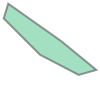

In [ ]:
gdf.geometry.iloc[30]

However, underlying this is a GeometryArray class:

In [ ]:
type(gdf.geometry.values)

geopandas.array.GeometryArray

which stores pointers to GEOS objects:

In [ ]:
gdf.geometry.values.data[:1]

array([<shapely.geometry.polygon.Polygon object at 0x7f3383765cd0>],
      dtype=object)

#**spatialpandas**

Spatialpandas provides Pandas and Dask extensions for vectorized spatial and geometric operations, such as fast, spatially indexed rendering of large collections of polygons, lines, or points.

Documentation
GitHub

In [ ]:
!pip install spatialpandas

In [8]:
import spatialpandas as spd

sdf = spd.GeoDataFrame(gdf)

sdf

,scalerank,featureclass,geometry
0,1,Country,"Polygon([[-59.57209469261153, -80.040178725096..."
1,1,Country,"Polygon([[-159.20818356019765, -79.49705942170..."
2,1,Country,"Polygon([[-45.154757656421026, -78.04706960058..."
3,1,Country,"Polygon([[-121.21151139385714, -73.50099049900..."
4,1,Country,"Polygon([[-125.55956640689533, -73.48135345473..."
...,...,...,...
122,1,Country,"Polygon([[51.136186557831394, 80.5472801785410..."
123,1,Country,"Polygon([[99.93976, 78.88094, 100.186655, 79.7..."
124,1,Country,"Polygon([[-87.02, 79.66, -87.81, 80.3200000000..."
125,1,Country,"Polygon([[-68.5, 83.10632151676583, -70.665765..."


Instead of storing shapely or GEOS objects, spatialpandas declares geometry array classes:

In [9]:
type(sdf.geometry.values)

spatialpandas.geometry.polygon.PolygonArray

which stores the geometry data as a contiguous PyArrow ListArray:

In [10]:
sdf.geometry.values.data[:1]

[
  [
    [
      -59.5721,
      -80.0402,
      -60.6101,
      -79.6287,
      -61.139,
      -79.9814,
      -61.8832,
      -80.3929,
      -64.0377,
      -80.2949,
      ...
      -64.4881,
      -80.9219,
      -62.2554,
      -80.8632,
      -60.1597,
      -81.0003,
      -59.8658,
      -80.5497,
      -59.5721,
      -80.0402
    ]
  ]
]

Spatialpandas supports spatially indexing a GeoDataFrame of geometries ensuring that nearby geometries are stored in the same partitions. This ensures that without loading data in memory we can quickly look up specific geometries with a spatial query.

In [18]:
sidf = dd.from_pandas(sdf, npartitions=8)

sidf

,scalerank,featureclass,geometry
npartitions=8,,,
0,int64,object,polygon[float64]
16,...,...,...
...,...,...,...
112,...,...,...
126,...,...,...


In [ ]:
!pip install datashader

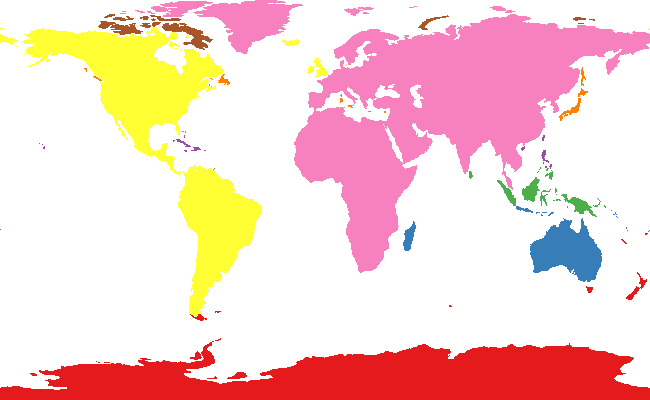

In [24]:
import datashader as ds

def plot_partitions(ddf):
    # Get divisions array
    divs = np.array(ddf.divisions)[:-1]
    
    # Add categorical "partition" column
    ddf2 = ddf.map_partitions(
        lambda df: df.assign(
            partition=pd.Categorical(np.searchsorted(divs, df.index, side="right"))
        )
    ).compute()
    
    # Create Datashader image, coloring countries by partition
    cvs = ds.Canvas(plot_width=650, plot_height=400)
    agg = cvs.polygons(ddf2, geometry='geometry', agg=ds.count_cat('partition'))
    return ds.transfer_functions.shade(agg)

plot_partitions(sidf)

In [25]:
minx, miny, maxx, maxy = sidf.geometry.total_bounds

N = 1_000_000

df_points = gpd.GeoDataFrame(
    {"id": np.arange(N)},
    geometry=gpd.points_from_xy(minx + maxx * np.random.random(N), miny + maxy * np.random.random(N)),
    crs=gdf.crs
)

sdf_points = dd.from_pandas(spd.GeoDataFrame(df_points), npartitions=16).persist()


In [26]:
%%time
spd.sjoin(sdf_points, sdf).compute()

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


CPU times: user 20.9 s, sys: 374 ms, total: 21.3 s
Wall time: 17.6 s


,id,geometry,index_right,scalerank,featureclass
2,2,"Point([-66.19019094522884, -19.533089209480437])",95,1,Country
17,17,"Point([-60.55796021072291, -14.519681583482395])",95,1,Country
21,21,"Point([-68.58091425914412, -14.68174230077291])",95,1,Country
23,23,"Point([-52.748690534759376, -10.544769487680767])",95,1,Country
39,39,"Point([-41.687229665475485, -7.095332864720987])",95,1,Country
...,...,...,...,...,...
964880,964880,"Point([-120.71979436431285, -73.62373221132461])",3,1,Country
982684,982684,"Point([-121.94690998002119, -73.78397655653018])",3,1,Country
997808,997808,"Point([-118.79567504462523, -73.49426128384783])",3,1,Country
998260,998260,"Point([-120.71781614838312, -73.77525214867018])",3,1,Country


#**Datashader**
Accurately render even the largest data

Datashader is a graphics pipeline system for creating meaningful representations of large datasets quickly and flexibly. Datashader breaks the creation of images into a series of explicit steps that allow computations to be done on intermediate representations. This approach allows accurate and effective visualizations to be produced automatically without trial-and-error parameter tuning, and also makes it simple for data scientists to focus on particular data and relationships of interest in a principled way.

The computation-intensive steps in this process are written in ordinary Python but transparently compiled to machine code using Numba and flexibly distributed across CPU cores and processors using Dask or GPUs using CUDA. This approach provides a highly optimized rendering pipeline that makes it practical to work with extremely large datasets even on standard hardware, while exploiting distributed and GPU systems when available.

Documentation
GitHub

In [27]:
import datashader as ds

W = 1280
H = 768 

In [28]:
points_df = dd.read_parquet('/Users/philippjfr/development/datashader/examples/data/nyc_taxi.parq/').compute()

points_df

OSError: ignored

In [ ]:
%%time
cvs = ds.Canvas(plot_width=W, plot_height=H)

pickup_agg = cvs.points(points_df, 'pickup_x', 'pickup_y')

pickup_agg